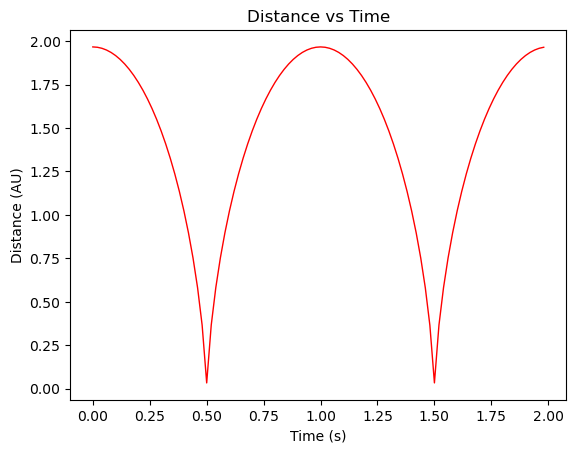

In [1]:
import math
import matplotlib.pyplot as plt

n = 20000
t = [0.0] * n
x = [0.0] * n
y = [0.0] * n
distAB = [0.0] * n
vx = [0.0] * n
vy = [0.0] * n
ax = [0.0] * n
ay = [0.0] * n
h = 2.0 / (n - 1)
h2 = h * h / 2
k = 39.478428 # gravitational constant*Mass of Sun in Halley's Comet's Semi-major axis^3/(period^2)

t[0] = 0.0
x[0] = 1.966843
y[0] = 0.0
distAB[0] = x[0]
vx[0] = 0.0
vy[0] = 0.815795
ax[0] = -k / (distAB[0] * distAB[0])
ay[0] = 0.0

for i in range(n - 1):
    t[i+1] = h * (i+1)
    x[i+1] = x[i] + h * vx[i] + h2 * ax[i]
    y[i+1] = y[i] + h * vy[i] + h2 * ay[i]
    distAB2 = x[i+1] * x[i+1] + y[i+1] * y[i+1]
    distAB[i+1] = math.sqrt(distAB2)
    distAB3 = distAB2 * distAB[i+1]
    ax[i+1] = -k * x[i+1] / distAB3
    ay[i+1] = -k * y[i+1] / distAB3
    vx[i+1] = vx[i] + h * (ax[i+1] + ax[i]) / 2
    vy[i+1] = vy[i] + h * (ay[i+1] + ay[i]) / 2

# Plotting the data
plt.plot(t[::200], distAB[::200], 'r-', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (AU)')
plt.title('Distance vs Time')
plt.show()


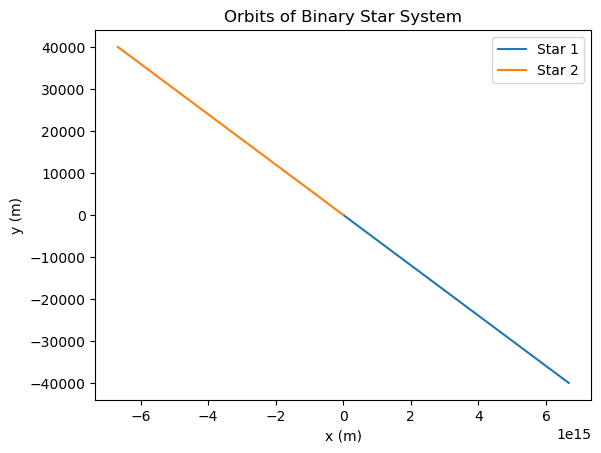

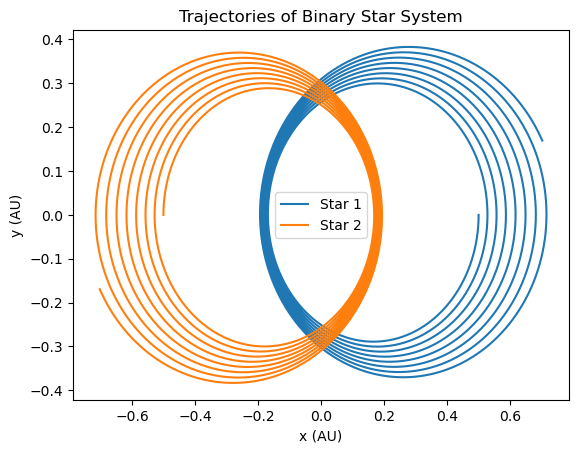

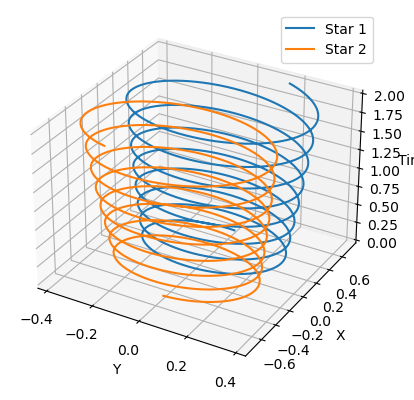

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set up initial conditions
k = 39.4784   # gravitational constant*Mass of Sun in Halley's Comet's Semi-major axis^3/(period^2)
n = 20000   # number of time steps
h = 2.0/(n-1)
t = np.zeros(n)
x1 = np.zeros(n)
y1 = np.zeros(n)
vx1 = np.zeros(n)
vy1 = np.zeros(n)
x2 = np.zeros(n)
y2 = np.zeros(n)
vx2 = np.zeros(n)
vy2 = np.zeros(n)

m1 = 1.0   # mass of star 1 in solar masses
x1[0] = 0.5   # initial position of star 1
y1[0] = 0
vx1[0] = 0 # initial velocity of star 1
vy1[0] = -1.0*np.sqrt(k/m1)   
m2 = 1.0   # mass of star 2 in solar masses
x2[0] = -0.5   # initial position of star 2
y2[0] = 0
vx2[0] = 0   # initial velocity of star 2
vy2[0] = 1*np.sqrt(k/m2)   

# Time evolution loop
for i in range(n-1):
    # Calculate distance and acceleration of star 1
    dist1 = np.sqrt(x1[i]**2 + y1[i]**2)
    ax1 = -k*x1[i]/dist1**3
    ay1 = -k*y1[i]/dist1**3
    # Calculate distance and acceleration of star 2
    dist2 = np.sqrt(x2[i]**2 + y2[i]**2)
    ax2 = -k*x2[i]/dist2**3
    ay2 = -k*y2[i]/dist2**3
    # Update positions and velocities of star 1
    x1[i+1] = x1[i] + h*vx1[i] + h**2/2*ax1
    y1[i+1] = y1[i] + h*vy1[i] + h**2/2*ay1
    vx1[i+1] = vx1[i] + h*ax1
    vy1[i+1] = vy1[i] + h*ay1
    # Update positions and velocities of star 2
    x2[i+1] = x2[i] + h*vx2[i] + h**2/2*ax2
    y2[i+1] = y2[i] + h*vy2[i] + h**2/2*ay2
    vx2[i+1] = vx2[i] + h*ax2
    vy2[i+1] = vy2[i] + h*ay2
    # Update time
    t[i+1] = t[i] + h

# Plot trajectories of star 1 and star 2
plt.plot(x1, y1, label='Star 1')
plt.plot(x2, y2, label='Star 2')
plt.title('Trajectories of Binary Star System')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(y1, x1, t, label='Star 1')
ax.plot(y2, x2, t, label='Star 2')
ax.set_xlabel('y (AU)')
ax.set_ylabel('x (AU)')
ax.set_zlabel('Time (years')
ax.legend()

plt.show()


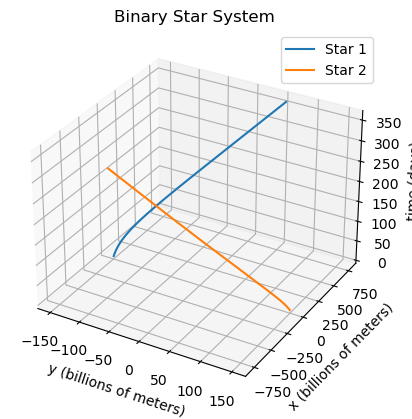

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m = 2e30  # mass of each star in kg
G = 6.674e-11  # gravitational constant in m^3/kg/s^2

# initial conditions
r1 = np.array([0, -1.496e11, 0])  # position of star 1 in m
v1 = np.array([2.9783e4, 0, 0])  # velocity of star 1 in m/s
r2 = -r1  # position of star 2 in m (equal mass)
v2 = -v1  # velocity of star 2 in m/s

# simulation parameters
dt = 3600  # time step in seconds
t = np.arange(0, 365.25*24*3600, dt)  # 1 year in seconds

# arrays to store positions
x1 = np.zeros_like(t)
y1 = np.zeros_like(t)
z1 = np.zeros_like(t)
x2 = np.zeros_like(t)
y2 = np.zeros_like(t)
z2 = np.zeros_like(t)

# Euler's method for numerical integration
for i in range(len(t)):
    # distance vector between the stars
    d = r2 - r1
    dist = np.linalg.norm(d)  # magnitude of the distance vector
    acc1 = G * m * d / dist**3  # acceleration of star 1
    acc2 = -acc1  # acceleration of star 2 (equal mass)
    
    # update velocities
    v1 = v1 + acc1 * dt
    v2 = v2 + acc2 * dt
    
    # update positions
    r1 = r1 + v1 * dt
    r2 = r2 + v2 * dt
    
    # store positions
    x1[i] = r1[1]  # y coordinate is x-axis in 3D plot
    y1[i] = r1[0]  # x coordinate is y-axis in 3D plot
    z1[i] = t[i]  # time is z-axis in 3D plot
    x2[i] = r2[1]
    y2[i] = r2[0]
    z2[i] = t[i]

# plot trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1/1e9, y1/1e9, z1/(24*3600), label='Star 1')
ax.plot(x2/1e9, y2/1e9, z2/(24*3600), label='Star 2')
ax.set_xlabel('y (billions of meters)')
ax.set_ylabel('x (billions of meters)')
ax.set_zlabel('time (days)')
ax.set_title('Binary Star System')
ax.legend()
plt.show()